# Team-G4-ExcelR-P53

# To predict loan status



### Business Objective:
To predict the impact of the incident raised by the customer.

### Data Set Details:
It’s not at all easy to get a loan from the bank. Getting a loan approved requires a complex mix of factors not the least of which is a steady income! So this ML project aims **to create a model that will classify how much loan the user can obtain** based on various factors such as the user’s marital status, income, education, employment prospects, number of dependents, etc. The dataset attached provides details about all these factors which can then be used to create an ML model that demonstrates the amount of loan that can be approved

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
loan = pd.read_csv("E:/Project/train.csv")

# Exploratory Data Analysis-(EDA)

steps involved to understand, clean and prepare our data for building model <br />
1. variable identification <br />
2. univariate analysis <br />
3. bi-variate analysis <br />
4. missing values treatment <br />
5. outliers treatment <br />
6. variable transformation <br />
7. variable creation <br />
Finally we iterate steps 4-7 till we get good model.

## Variable Identification

In [3]:
# look the data
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#check no. of rows and columns
loan.shape

(614, 13)

**Inference:** <br />
      There are 614 records and 13 features.

In [5]:
loan.info()  #There are some missing values in  data,we will handle as go along.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#Count distinct observations without NaN values.
loan.nunique().sort_values(ascending=False)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Loan_Status            2
Credit_History         2
Self_Employed          2
Education              2
Married                2
Gender                 2
dtype: int64

**Inference:** <br />
Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables.

In [7]:
# change the data type of Credit_History column
loan['Credit_History'] = loan['Credit_History'].astype('O')

In [8]:
#Let's look at the number of columns of each data type. int64 and float64 are numeric variables 
# (which can be either discrete or continuous). object columns contain strings and are categorical features.
loan.dtypes.value_counts()

object     9
float64    3
int64      1
dtype: int64

In [9]:
# unique classes in each object columns
object_var=loan.select_dtypes('object').columns
object_var=object_var[1:]
unique_values=[]
for i in range(0,8):
    unique_values.append(loan[object_var[i]].unique())
object_var_table=pd.DataFrame({"Object_variable":object_var,"Unique_Values":unique_values})
object_var_table

,Object_variable,Unique_Values
0,Gender,"[Male, Female, nan]"
1,Married,"[No, Yes, nan]"
2,Dependents,"[0, 1, 2, 3+, nan]"
3,Education,"[Graduate, Not Graduate]"
4,Self_Employed,"[No, Yes, nan]"
5,Credit_History,"[1.0, 0.0, nan]"
6,Property_Area,"[Urban, Rural, Semiurban]"
7,Loan_Status,"[Y, N]"


In [10]:
#describe the numeric columns
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [11]:
# describe the chategoric columns
loan.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001478,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


# Data visualization

## Univariate Analysis

#### Categorical Variables:

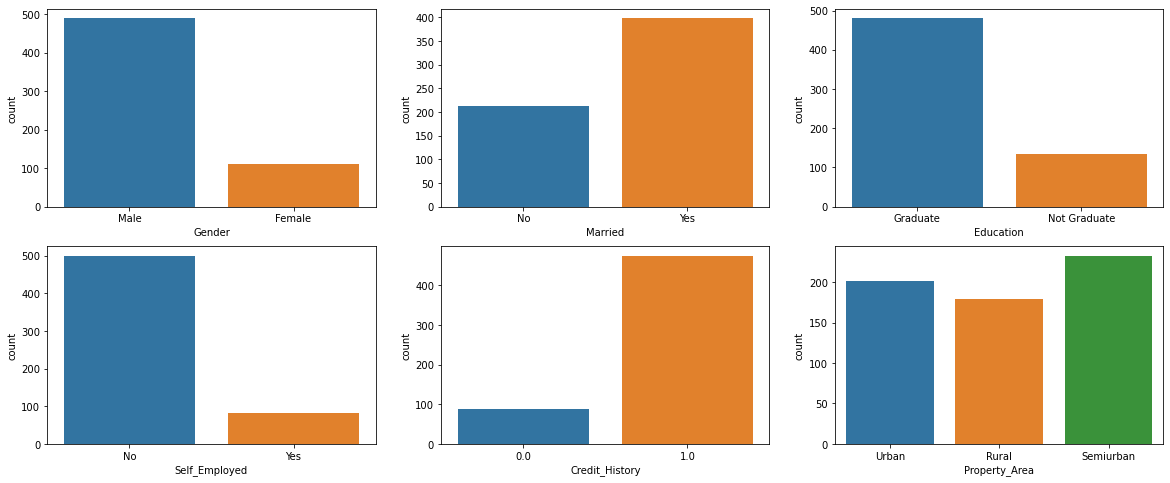

In [12]:
#Univariate Analysis
plt.figure(figsize=(20,8))http://localhost:8888/notebooks/Downloads/Team-Ecelr-P53-G4%20(2).ipynb#
plt.subplot(231);sns.countplot('Gender',data=loan);        plt.subplot(232);sns.countplot('Married',data=loan)
plt.subplot(233);sns.countplot('Education',data=loan);     plt.subplot(234);sns.countplot('Self_Employed',data=loan)
plt.subplot(235);sns.countplot('Credit_History',data=loan);plt.subplot(236);sns.countplot('Property_Area',data=loan);plt.show()

In [13]:
loan.select_dtypes('object').columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
#Univariate Analysis
# plt.figure(figsize=(20,8))
# j=1
# for i in loan.select_dtypes('object').columns:
#     if(i != 'Loan_ID') | (i != 'Loan_Status') | (i != 'Dependents'):
#         plt.subplot(2,3,j);sns.countplot('Gender',data=loan)
#     j+=1

**Inference:** <br />
Mostly, those who **Male**, **Married**, **Graduated**, **Not Self_Employed** they applied for Loan.<br />
Those who a high **Credit_History** (1.0) they mostly applied for Loan.<br />
From any **Property_Area** people applied for Loan.

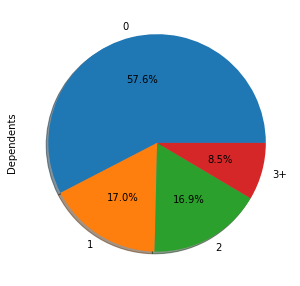

In [15]:
plt.figure(figsize=(10,5))
loan['Dependents'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True);plt.show()

**Inference:** <br />
Mostly those who have **NO dependents** they applied for Loan

Y    422
N    192
Name: Loan_Status, dtype: int64


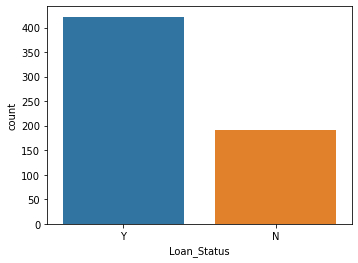

In [16]:
# Targate Vaariable
plt.figure(figsize=(12,4));plt.subplot(122);sns.countplot(loan['Loan_Status'])#check our data is balanced or not
print(loan['Loan_Status'].value_counts())

**Inference:** <br />
From above, data is imbalanced we need to balance it.

### Continuous Variables:

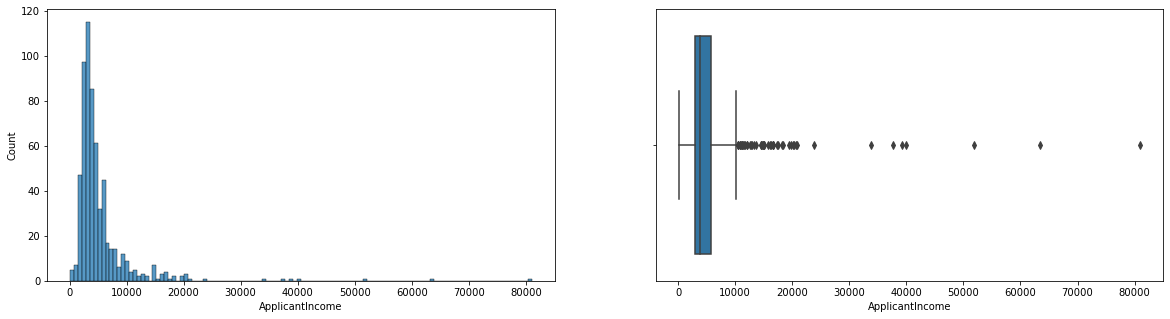

In [17]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['ApplicantIncome']);plt.subplot(122);sns.boxplot(loan['ApplicantIncome'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in ApplicantIncome.

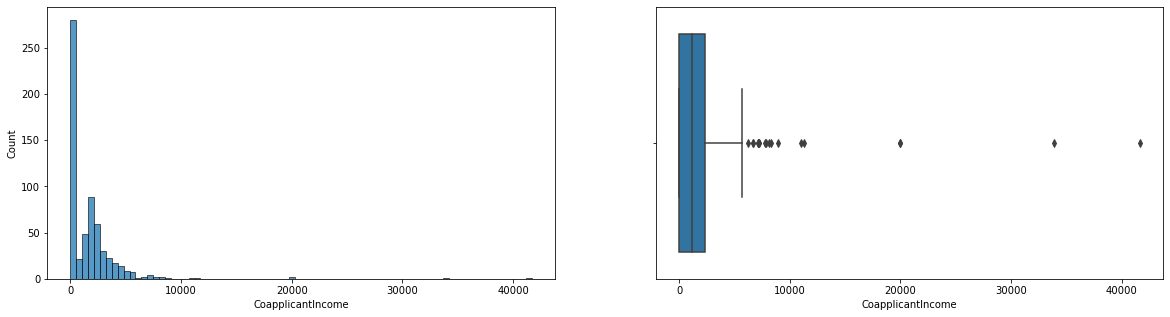

In [18]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['CoapplicantIncome']);plt.subplot(122);sns.boxplot(loan['CoapplicantIncome'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and There are *Outliers* in CoapplicantIncome.

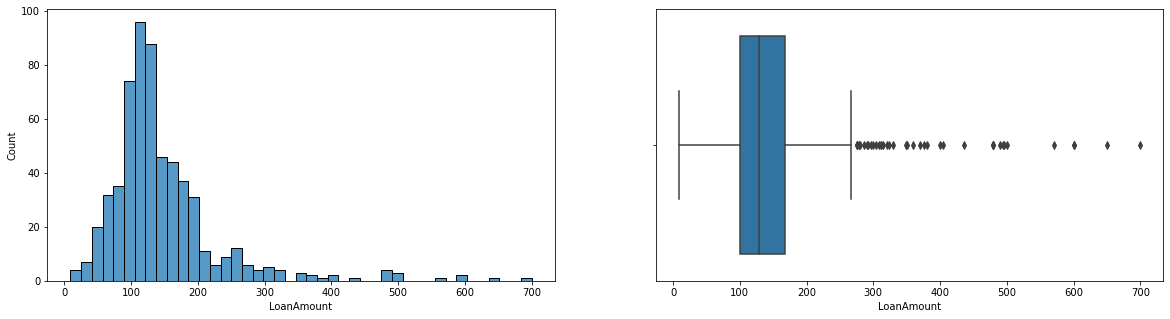

In [19]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['LoanAmount']);plt.subplot(122);sns.boxplot(loan['LoanAmount'])
plt.show()

**Inference:** <br />
Our data is *Not Normal* (Right Skewed) and Huge *Outliers* in LoanAmount.

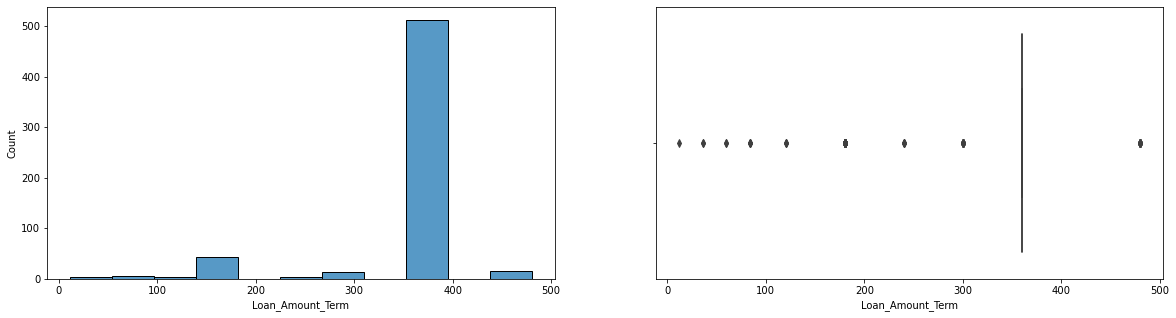

In [20]:
plt.figure(figsize=(20,5));plt.subplot(121); sns.histplot(loan['Loan_Amount_Term']);plt.subplot(122);sns.boxplot(loan['Loan_Amount_Term'])
plt.show()

**Inference:** <br />
Most **Loan_Amount_Term** is 360 only.

## Bi-variate Analysis

In [21]:
loan.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y


In [22]:
# First we split numeric and chategoric columns seperately
cat_data = []
num_data = []
for col,types in enumerate(loan.dtypes):
    if types=='object':
        cat_data.append(loan.iloc[:,col])
    else:
        num_data.append(loan.iloc[:,col])

cat_data = pd.DataFrame(cat_data).T
num_data = pd.DataFrame(num_data).T

### Continuous & Continuous :

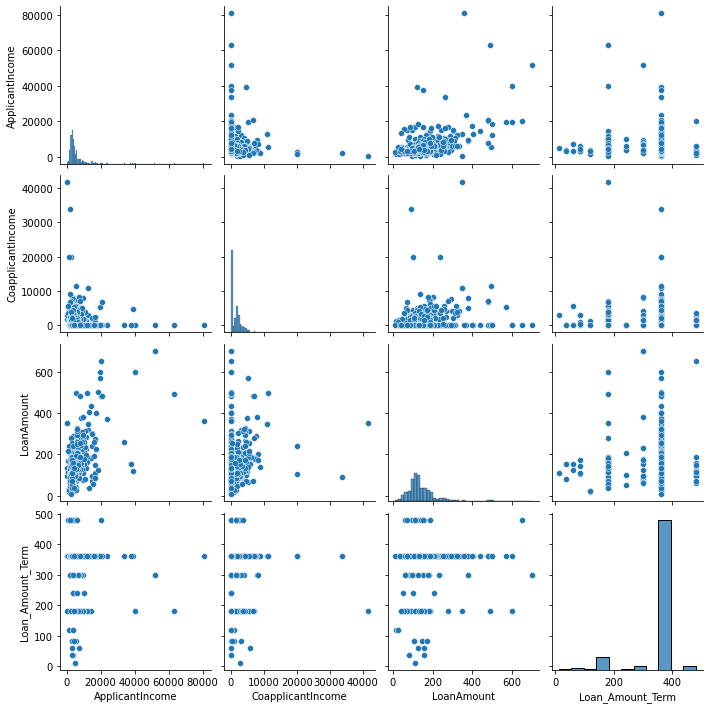

In [23]:
sns.pairplot(num_data);plt.show();plt.style.use('seaborn-darkgrid')

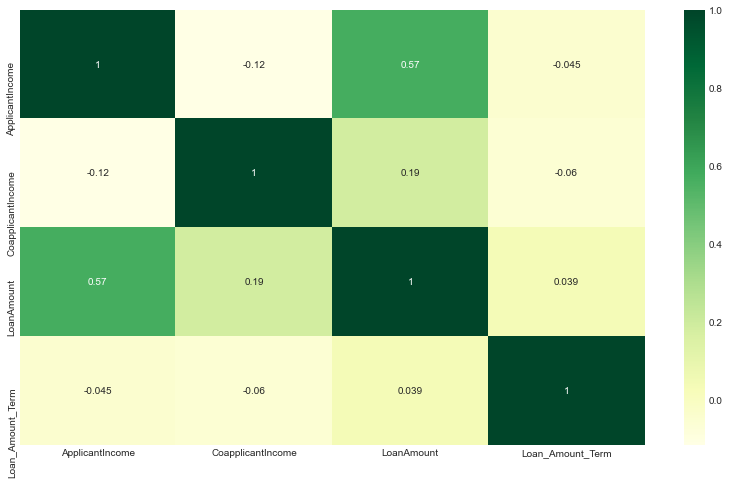

In [24]:
plt.figure(figsize=(14,8))
sns.heatmap(loan.corr(), annot = True, cmap="YlGn");plt.show()

### Categorical & Categorical :

#### Two-way table

In [25]:
Education_tab=pd.crosstab(loan.Education,loan.Gender)
Education_tab  # we can see how many males and females are graduated or not.

Gender,Female,Male
Education,,
Graduate,92,376
Not Graduate,20,113


In [26]:
dependence_tab=pd.crosstab(loan.Dependents,loan.Self_Employed)
dependence_tab   # we can see those who NOT Self_Employed and NOT dependent mostly they apply for loan

Self_Employed,No,Yes
Dependents,,
0,289,37
1,76,20
2,80,16
3+,42,7


####  Pie Chart : (with target variable)

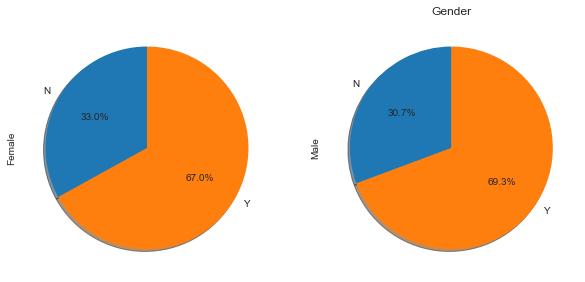

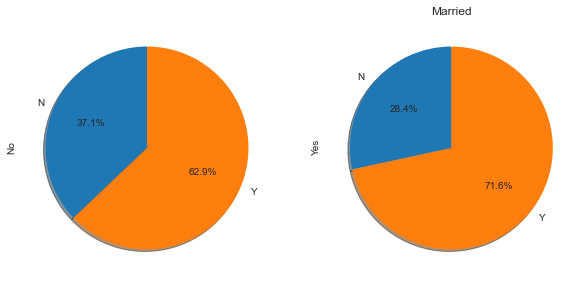

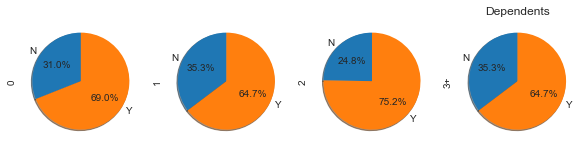

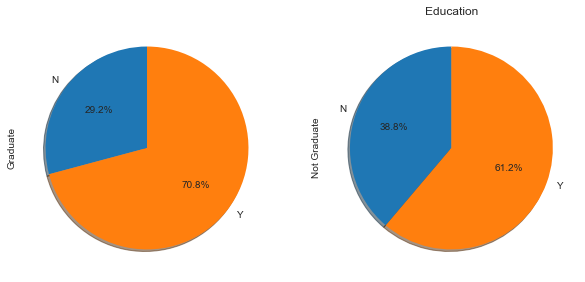

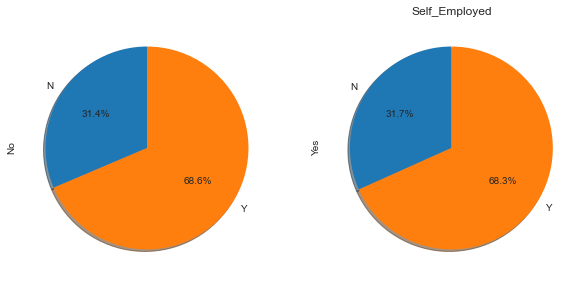

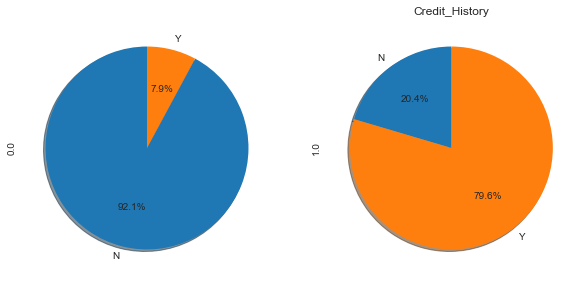

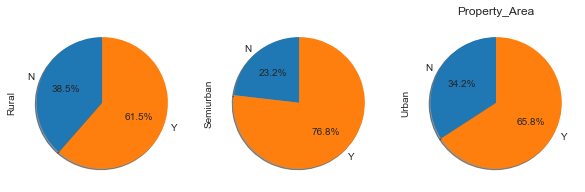

In [27]:
for i in object_var:
    if i!="Loan_Status":
        loan.groupby(["Loan_Status",i]).size().unstack(fill_value=0).plot.pie(subplots=True,figsize=(10, 8),startangle=90,shadow=True,autopct='%1.1f%%',legend=False)
        plt.title(i)

**Inference:** <br />
The People who have  good Credit History they got loan  most of the Time and other variables plays less importance role.

#### Chi-Square Test:

In [28]:
from scipy.stats import chi2_contingency
First_var=[]
Sec_var=[]
p_value=[]
Interpretation=[]
chi_square=[]
for i in cat_data.columns:
    crossT=pd.crosstab(cat_data[i],cat_data['Loan_Status'])
    p=chi2_contingency(crossT)[1]
    c=chi2_contingency(crossT)[0]
    First_var.append(i)
    Sec_var.append("Loan_Status")
    p_value.append(p)
    chi_square.append(c)
    if p<=0.05:
        Interpretation.append("The two categorical variables are dependent")
    else:
        Interpretation.append("The two categorical variables are independent")
description=pd.DataFrame({"Features":cat_data.columns,"Target variable":Sec_var,"chi2_score":chi_square,"p_value":p_value,"Interpretation":Interpretation})
description

,Features,Target variable,chi2_score,p_value,Interpretation
0,Loan_ID,Loan_Status,614.000000,4.810243e-01,The two categorical variables are independent
1,Gender,Loan_Status,0.139626,7.086530e-01,The two categorical variables are independent
2,Married,Loan_Status,4.475019,3.439381e-02,The two categorical variables are dependent
3,Dependents,Loan_Status,3.158340,3.678507e-01,The two categorical variables are independent
4,Education,Loan_Status,4.091490,4.309962e-02,The two categorical variables are dependent
5,Self_Employed,Loan_Status,0.005293,9.420039e-01,The two categorical variables are independent
6,Credit_History,Loan_Status,174.637297,7.184760e-40,The two categorical variables are dependent
7,Property_Area,Loan_Status,12.297623,2.136019e-03,The two categorical variables are dependent
8,Loan_Status,Loan_Status,609.355922,1.544676e-134,The two categorical variables are dependent


### Categorical & Continuous :

In [29]:
import ppscore as pps
pps.predictors(loan,"Loan_Status") #We can calculate the PPS of all the predictors in the dataframe against a target y

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Credit_History,Loan_Status,0.492600,classification,True,weighted F1,0.592199,0.793081,DecisionTreeClassifier()
1,LoanAmount,Loan_Status,0.055993,classification,True,weighted F1,0.570946,0.594970,DecisionTreeClassifier()
2,Loan_Amount_Term,Loan_Status,0.039016,classification,True,weighted F1,0.573333,0.589980,DecisionTreeClassifier()
3,CoapplicantIncome,Loan_Status,0.036726,classification,True,weighted F1,0.563518,0.579548,DecisionTreeClassifier()
4,ApplicantIncome,Loan_Status,0.004756,classification,True,weighted F1,0.563518,0.565594,DecisionTreeClassifier()
5,Loan_ID,Loan_Status,0.000000,feature_is_id,True,None,0.000000,0.000000,None
6,Gender,Loan_Status,0.000000,classification,True,weighted F1,0.577371,0.561944,DecisionTreeClassifier()
7,Married,Loan_Status,0.000000,classification,True,weighted F1,0.557930,0.557927,DecisionTreeClassifier()
8,Dependents,Loan_Status,0.000000,classification,True,weighted F1,0.569282,0.562767,DecisionTreeClassifier()
9,Education,Loan_Status,0.000000,classification,True,weighted F1,0.563518,0.559917,DecisionTreeClassifier()


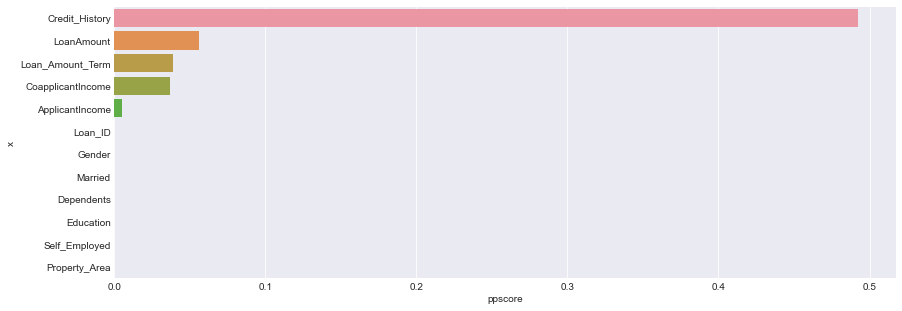

In [30]:
#Visualization of the results
plt.figure(figsize=(14,5))
predictors_df = pps.predictors(loan, y="Loan_Status")
sns.barplot(data=predictors_df, x="ppscore", y="x");plt.show()

## Missing Value Treatment

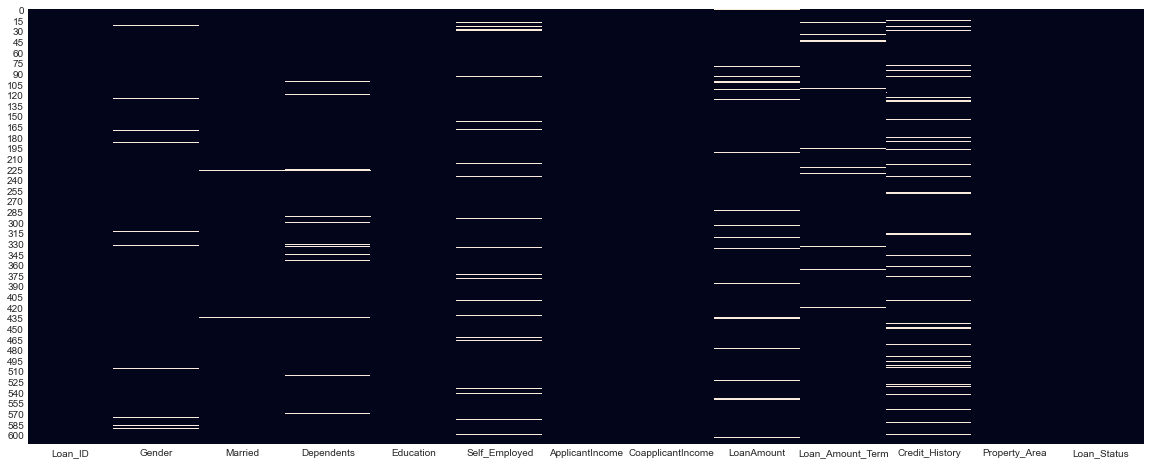

In [31]:
# visualize using Heat map
plt.figure(figsize=(20,8))
sns.heatmap(loan.isnull(), cbar=False);plt.show()

In [32]:
#Checking the null Values in Data
loan.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [33]:
#Function to calculate missing values by column function
def miss_value_table(df):
    miss_value=df.isnull().sum()
    percent_miss_value=(miss_value/len(df))*100
    miss_value_table=pd.concat([miss_value, percent_miss_value],axis=1)
    miss_value_table_columns=miss_value_table.rename({0:'Missing Values',1 : '% of Total Values'},axis=1)
    miss_value_table_columns=miss_value_table_columns[miss_value_table_columns.iloc[:,1]!=0].sort_values('% of Total Values',ascending=False).round(1)
    return miss_value_table_columns    
missing_values=miss_value_table(loan)
missing_values

,Missing Values,% of Total Values
Credit_History,50,8.1
Self_Employed,32,5.2
LoanAmount,22,3.6
Dependents,15,2.4
Loan_Amount_Term,14,2.3
Gender,13,2.1
Married,3,0.5


**Inference:** <br />
When it comes time to build our machine learning models, we will have to fill in these missing values (known as imputation). 

In [34]:
cat_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,Y


In [35]:
#missing value imputation for categorical variable using mode
cat_data.fillna(cat_data.mode().iloc[0], inplace=True)
cat_data.isnull().sum().any() # no more missing data 

False

In [36]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [37]:
#missing value imputation for numeric variable using backfill (use next valid observation to fill gap)
num_data.fillna(method='bfill', inplace=True)
num_data.isnull().sum().any() #no more missing data

False

In [38]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome on train data
num_data['TotalIncome'] = num_data['ApplicantIncome'] + num_data['CoapplicantIncome']

In [39]:
num_data.drop(['ApplicantIncome','CoapplicantIncome'],axis=1,inplace=True)

In [40]:
num_data.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,128.0,360.0,5849.0
1,128.0,360.0,6091.0
2,66.0,360.0,3000.0
3,120.0,360.0,4941.0
4,141.0,360.0,6000.0


In [41]:
# Transform the Target column
target_values = {'Y':1,'N':0}
target = cat_data['Loan_Status']
y = target.map(target_values)

In [42]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [43]:
cat_data.drop(columns={'Loan_Status','Loan_ID'}, axis=1, inplace=True)

In [44]:
cat_data['Gender'].replace({'Male':1,'Female':0},inplace=True)
cat_data['Married'].replace({'Yes':1,'No':0},inplace=True)
cat_data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
cat_data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)

In [45]:
cat_data['Credit_History'] = cat_data['Credit_History'].astype('int64')

In [46]:
# transform other columns
cat_data = pd.get_dummies(cat_data)
cat_data.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,1,1,0,0,0,0,0,1
1,1,1,1,0,1,0,1,0,0,1,0,0
2,1,1,1,1,1,1,0,0,0,0,0,1
3,1,1,0,0,1,1,0,0,0,0,0,1
4,1,0,1,0,1,1,0,0,0,0,0,1


## variable transformation

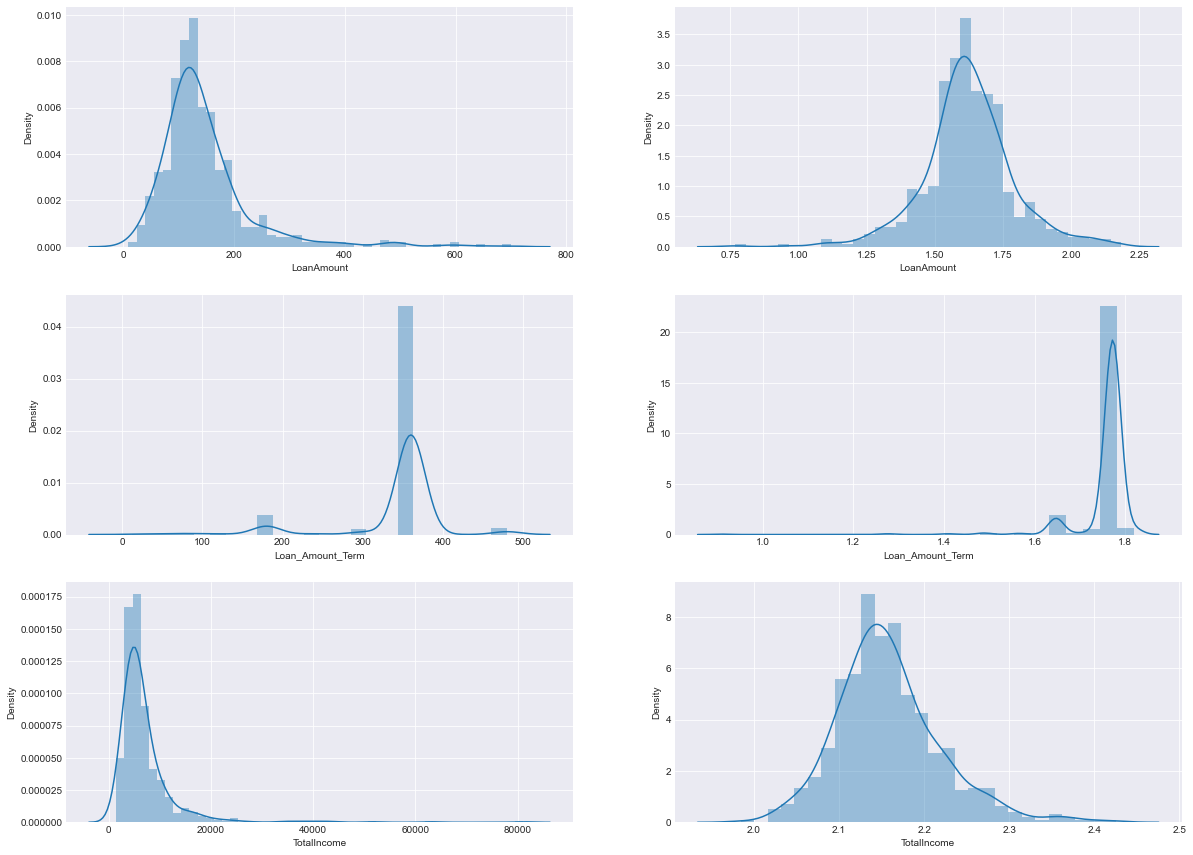

In [47]:
plt.figure(figsize=(20,15))
plt.subplot(321);sns.distplot(num_data['LoanAmount']);      plt.subplot(322);sns.distplot(np.log(np.cbrt(num_data["LoanAmount"]+1)))
plt.subplot(323);sns.distplot(num_data['Loan_Amount_Term']);plt.subplot(324);sns.distplot(np.log(np.log(num_data['Loan_Amount_Term'])))
plt.subplot(325);sns.distplot(num_data['TotalIncome']);     plt.subplot(326);sns.distplot(np.log(np.log(num_data["TotalIncome"]+1)));plt.show()

In [48]:
num_data_trans = pd.DataFrame()   
num_data_trans['LoanAmount'] =np.log(np.cbrt(num_data["LoanAmount"]+1))
#num_data_trans['Loan_Amount_Term']=np.log(np.log(num_data['Loan_Amount_Term']))
num_data_trans['Loan_Amount_Term']=pow(num_data['Loan_Amount_Term'],3)
num_data_trans['TotalIncome'] =np.log(np.log(num_data["TotalIncome"]+1))

In [49]:
num_data_trans.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,1.619937,46656000.0,2.160353
1,1.619937,46656000.0,2.165015
2,1.401564,46656000.0,2.080279
3,1.598597,46656000.0,2.140716
4,1.651942,46656000.0,2.163286


In [50]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler()
num_scale = pd.DataFrame(scale.fit_transform(num_data_trans),columns=num_data_trans.columns)

In [51]:
num_scale.head()

,LoanAmount,Loan_Amount_Term,TotalIncome
0,0.601711,0.421866,0.399387
1,0.601711,0.421866,0.409968
2,0.447563,0.421866,0.217659
3,0.586647,0.421866,0.354821
4,0.624304,0.421866,0.406045


In [52]:
final_loan = pd.concat([cat_data, num_scale, y], axis=1)

In [53]:
final_loan.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome,Loan_Status
0,1,0,1,0,1,1,0,0,0,0,0,1,0.601711,0.421866,0.399387,1
1,1,1,1,0,1,0,1,0,0,1,0,0,0.601711,0.421866,0.409968,0
2,1,1,1,1,1,1,0,0,0,0,0,1,0.447563,0.421866,0.217659,1
3,1,1,0,0,1,1,0,0,0,0,0,1,0.586647,0.421866,0.354821,1
4,1,0,1,0,1,1,0,0,0,0,0,1,0.624304,0.421866,0.406045,1


In [54]:
final_loan.shape

(614, 16)

In [55]:
# spliting data 
X = final_loan.iloc[:,:-1]
Y = final_loan.iloc[:,-1]

In [56]:
X.head()

,Gender,Married,Education,Self_Employed,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,Loan_Amount_Term,TotalIncome
0,1,0,1,0,1,1,0,0,0,0,0,1,0.601711,0.421866,0.399387
1,1,1,1,0,1,0,1,0,0,1,0,0,0.601711,0.421866,0.409968
2,1,1,1,1,1,1,0,0,0,0,0,1,0.447563,0.421866,0.217659
3,1,1,0,0,1,1,0,0,0,0,0,1,0.586647,0.421866,0.354821
4,1,0,1,0,1,1,0,0,0,0,0,1,0.624304,0.421866,0.406045


In [57]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Balancing the data

In [58]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

for more [information](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler)

In [59]:
print('Original data set shape %s' % Counter(Y))
imb = RandomOverSampler(sampling_strategy='minority',random_state=1)
X_res,Y_res = imb.fit_resample(X,Y)
print('Resample data set shape %s' % Counter(Y_res))

Original data set shape Counter({1: 422, 0: 192})
Resample data set shape Counter({1: 422, 0: 422})


### Feature Engineering(Univariate Feature Selection)

In [60]:
from sklearn.feature_selection import chi2
a = chi2(X,Y) # it gives chi2 value and p_values
pd.DataFrame({"Features":X.columns,"Target variable":"Loan_Status","chi2_score":a[0],"p_value":a[1]}).sort_values(by='p_value')

,Features,Target variable,chi2_score,p_value
4,Credit_History,Loan_Status,26.005877,3.403796e-07
10,Property_Area_Semiurban,Loan_Status,7.103093,7.695104e-03
9,Property_Area_Rural,Loan_Status,4.410584,3.571661e-02
7,Dependents_2,Loan_Status,1.996446,1.576685e-01
1,Married,Loan_Status,1.782425,1.818518e-01
2,Education,Loan_Status,0.988390,3.201361e-01
11,Property_Area_Urban,Loan_Status,0.783946,3.759370e-01
6,Dependents_1,Loan_Status,0.768400,3.807125e-01
8,Dependents_3+,Loan_Status,0.384200,5.353641e-01
13,Loan_Amount_Term,Loan_Status,0.096295,7.563219e-01


In [61]:
concat_data=pd.concat([X_res,Y_res],axis=1)

In [62]:
import ppscore as pps
pps.predictors(concat_data,"Loan_Status")

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,TotalIncome,Loan_Status,0.419206,regression,True,mean absolute error,0.5,0.290397,DecisionTreeRegressor()
1,Credit_History,Loan_Status,0.238550,regression,True,mean absolute error,0.5,0.380725,DecisionTreeRegressor()
2,LoanAmount,Loan_Status,0.173010,regression,True,mean absolute error,0.5,0.413495,DecisionTreeRegressor()
3,Property_Area_Semiurban,Loan_Status,0.023160,regression,True,mean absolute error,0.5,0.488420,DecisionTreeRegressor()
4,Loan_Amount_Term,Loan_Status,0.011363,regression,True,mean absolute error,0.5,0.494318,DecisionTreeRegressor()
5,Property_Area_Rural,Loan_Status,0.010395,regression,True,mean absolute error,0.5,0.494803,DecisionTreeRegressor()
6,Education,Loan_Status,0.005758,regression,True,mean absolute error,0.5,0.497121,DecisionTreeRegressor()
7,Dependents_2,Loan_Status,0.003183,regression,True,mean absolute error,0.5,0.498409,DecisionTreeRegressor()
8,Married,Loan_Status,0.002622,regression,True,mean absolute error,0.5,0.498689,DecisionTreeRegressor()
9,Gender,Loan_Status,0.000000,regression,True,mean absolute error,0.5,0.501771,DecisionTreeRegressor()


In [94]:
from imblearn.combine import SMOTETomek 

In [105]:
print('Original data set shape %s' % Counter(Y))
imb = SMOTETomek(sampling_strategy='minority',random_state=1)
X_res,Y_res = imb.fit_resample(X,Y)
print('Resample data set shape %s' % Counter(Y_res))

Original data set shape Counter({1: 422, 0: 192})
Resample data set shape Counter({1: 380, 0: 380})


In [106]:
#X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban'],axis=1)
#Y_res=Y_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban'],axis=1)

#X_res=X_res.drop(["Loan_Amount_Term"],axis=1)
##X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban',"Gender",'Married','Dependents_2','Education','Property_Area_Rural'],axis=1)
##X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban',"Gender",'Married','Dependents_2','Education','Property_Area_Rural','Loan_Amount_Term'],axis=1)
#X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban',"Gender",'Married','Dependents_2','Education'],axis=1)
##X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban',"Gender",'Married'],axis=1)
X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban',"Gender"],axis=1)
#X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+','Property_Area_Urban'],axis=1)
#X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+'],axis=1)
##X_res=X_res.drop(['Self_Employed','Dependents_0','Dependents_1','Dependents_3+'],axis=1)
#X_res=X_res.drop(['Self_Employed'],axis=1)






In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((608, 9), (152, 9), (608,), (152,))

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [109]:
accuracy = []
for i in range(3,200):
  model1 = KNeighborsClassifier(n_neighbors=i)
  model1.fit(X_train,y_train)
  ypred1 = model1.predict(X_test)
  a = accuracy_score(y_test,ypred1)
  accuracy.append(a)


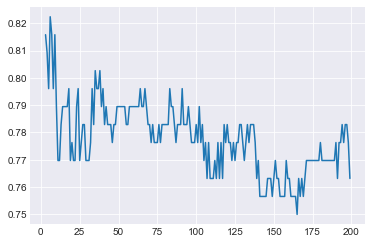

In [110]:
import matplotlib.pyplot as plt
plt.plot(range(3,200),accuracy)
plt.show()

In [111]:
ac=[]
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    ac=accuracy_score(y_test,ypred)
    print(ac)

0.8552631578947368
0.8486842105263158
0.8157894736842105
0.8092105263157895
0.7960526315789473
0.8223684210526315
0.8157894736842105
0.7960526315789473
0.8157894736842105
0.7894736842105263
0.7697368421052632
0.7697368421052632
0.7828947368421053
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7894736842105263
0.7960526315789473
0.7697368421052632
0.7763157894736842
0.7697368421052632
0.7697368421052632
0.7894736842105263
0.7960526315789473


In [120]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
ypred = model.predict(X_test)
ac = accuracy_score(y_test,ypred)
print(ac)

0.8157894736842105


In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
cm

array([[58, 18],
       [10, 66]], dtype=int64)

In [122]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,ypred)
print(classification_report)


              precision    recall  f1-score   support

           0       0.85      0.76      0.81        76
           1       0.79      0.87      0.82        76

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.82       152
weighted avg       0.82      0.82      0.82       152



In [115]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}


In [116]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5)
kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [119]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score
import sklearn

num_trees = 97
max_features = 10
kfold = StratifiedKFold(n_splits=10, random_state=None)
model = KNeighborsClassifier(n_neighbors=3)
results = sklearn.model_selection.cross_validate(model,X_res,Y_res, cv=kfold,scoring=scoring)
#precision,recall,fscore,support=score(y_test,y_pred,average='macro')
result=pd.DataFrame(results)
result.mean()

fit_time          0.009173
score_time        0.020342
test_accuracy     0.805263
test_precision    0.808538
test_recall       0.800000
test_f1_score     0.803340
dtype: float64

In [76]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred=model_LR.predict(X_test)

In [77]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.44      0.61        90
           1       0.61      0.99      0.75        79

    accuracy                           0.70       169
   macro avg       0.79      0.72      0.68       169
weighted avg       0.80      0.70      0.68       169



In [78]:
model_influence=model_LR.get_influence()
(c,_)=model_influence.cooks_distance
fig=plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(df1)),np.round(c,3))

AttributeError: 'LogisticRegression' object has no attribute 'get_influence'

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,Y_res,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred=model_LR.predict(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred=model_LR.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
classification_report=classification_report(y_test,y_pred)
print(classification_report)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,y_pred)
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

In [ ]:
from sklearn.model_selection import KFold
kf = StratifiedKFold(n_splits=2)
kf

In [ ]:
TXTR=[]
TXTE=[]
TYTR=[]
TYTE=[]
for train_index, test_index in kf.split(X_res,Y_res):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X_res.iloc[train_index], X_res.iloc[test_index]
    y_train, y_test = Y_res.iloc[train_index], Y_res.iloc[test_index]
    TXTR.append(X_train)
TXTR    

In [ ]:
kf.split(X_res,Y_res)

In [ ]:
Y_res.shape

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as score

num_trees = 97
max_features = 10
kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression()
results = cross_val_score(model,X_res,Y_res, cv=kfold)
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
print(results.mean())